# 🚂 **Analyse du réseau ferré de la SNCF: Comment expliquer les retards permanents de la compagnie française ?** 🚂



Comme tout bon étudiant provincial du plateau de Saclay, nous avons régulièrement eu à faire aux retards interminables des trains de la SNCF. A l'heure où le train est de plus en plus destiné à remplacer l'aviation civile ultra-polluante, nous avons voulu analyser l'évolution et les causes des retards que subissent fréquemment les usagers du réseau ferré français. 

Pour cela, nous avons basé notre analyse sur différentes bases de données rendues publiques et entretenues par la SNCF elle même. Ce travail a vocation à répondre aux exigences du cours de **Python pour la Data Science** de 2ème année de l'ENSAE Paris et reprend la même articulation en 3 axes: 
- Récupération et traitement des données
- Analyse descriptive et représentation graphique
- Modélisation 

Tout au long de ce notebook, nous ferons appel à des fonctions utiles définies dans le fichier **fonctions.py**. A la fin du travail d'analyse, nous vous proposons également un petit jeu intéractif bonus à ouvrir dans un autre éditeur de code que Jupyter. 

## **1. RÉCUPÉRATION DE DONNÉES : importation et traitement des données de l'API de la SNCF**

On commence par importer les librairies et les fonction définies dans le fichier **fonction.py**

In [2]:
from fonctions import *

Nous avons commencé notre travail sur le site de l'API SNCF *https://ressources.data.sncf.com/api/v2/console*. Il propose d'accéder à plus de 216 datasets qui regroupent différents types de données concernant la SNCF. Le premier fichier que nous avons étudié est le **Catalogue** qui présente tous les autres datasets disponnibles sur l'API. C'est à partir de ce Catalogue que nous avons pu identifier les différents datasets utiles à nos analyses.

In [3]:
df_catalogue = importer("https://ressources.data.sncf.com/api/v2/catalog/exports/json?limit=-1&offset=0&timezone=UTC")
pd.DataFrame(df_catalogue['dataset_id']).head()

,dataset_id
0,frequence-gare
1,bilan-actif-2017-cso
2,repartition-des-motifs-de-deplacements-des-voy...
3,enquetes-gares-connexions-repartition-homme-femme
4,provisions-risques-et-charges-2017-cco


### **1.1 Analyse de la répartition/fréquentation des gares de la SNCF**

Pour commencer notre analyse, nous avons voulu identifier les stations SNCF les plus fréquentées afin d'avoir une meilleure idée du maillage du réseau ferré français. Nous allons chercher les données qui nous interessent dans les datasets **liste_des_gares** et **frequentations_gares** disponnibles sur l'API de la SNCF.


#### **1.1.1 Importation des données**

In [4]:
#importation de la liste des gares, API SNCF
df_gares = importer("https://ressources.data.sncf.com/api/v2/catalog/datasets/liste-des-gares/exports/json?limit=-1&offset=0&timezone=UTC")
df_gares.head(2)

,code_uic,libelle,fret,voyageurs,code_ligne,rg_troncon,pk,commune,departemen,idreseau,idgaia,x_l93,y_l93,x_wgs84,y_wgs84,c_geo,geo_point_2d,geo_shape
0,87755223,Bandol,N,O,930000,1,050+607,BANDOL,VAR,3077,29a5a626-dfbc-11e3-a2ff-01a464e0362d,923833.7169,6.230702e+06,5.749816,43.140491,"{'lon': 5.749815526229215, 'lat': 43.140491048...","{'lon': 5.749815526229215, 'lat': 43.140491047...","{'type': 'Feature', 'geometry': {'coordinates'..."
1,87696179,Pouilly-sur-Loire,O,O,750000,1,214+004,POUILLY-SUR-LOIRE,NIEVRE,6141,297a4c76-dfbc-11e3-a2ff-01a464e0362d,697358.2537,6.686913e+06,2.965051,47.282528,"{'lon': 2.965051211539136, 'lat': 47.282528482...","{'lon': 2.965051211539134, 'lat': 47.282528481...","{'type': 'Feature', 'geometry': {'coordinates'..."


In [5]:
"""
#si erreur "Max retries exceeded with url" dans la cellule précédente, utiliser cette cellule

import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('http://', adapter)
session.mount('https://', adapter)

session.get(url_retards)
"""

'\n#si erreur "Max retries exceeded with url" dans la cellule précédente, utiliser cette cellule\n\nimport requests\nfrom requests.adapters import HTTPAdapter\nfrom urllib3.util.retry import Retry\n\nsession = requests.Session()\nretry = Retry(connect=3, backoff_factor=0.5)\nadapter = HTTPAdapter(max_retries=retry)\nsession.mount(\'http://\', adapter)\nsession.mount(\'https://\', adapter)\n\nsession.get(url_retards)\n'

In [6]:
#importation des données sur la frequentation des gares, API SNCF
df_freq_gares = importer("https://ressources.data.sncf.com/api/v2/catalog/datasets/frequentation-gares/exports/json?limit=-1&offset=0&timezone=UTC")
df_freq_gares.head(2)

,nom_gare,code_uic_complet,code_postal,segmentation_drg,total_voyageurs_2021,total_voyageurs_non_voyageurs_2021,total_voyageurs_2020,total_voyageurs_non_voyageurs_2020,total_voyageurs_2019,total_voyageurs_non_voyageurs_2019,total_voyageurs_2018,total_voyageurs_non_voyageurs_2018,totalvoyageurs2017,total_voyageurs_non_voyageurs_2017,total_voyageurs_2016,total_voyageurs_non_voyageurs_2016,total_voyageurs_2015,total_voyageurs_non_voyageurs_2015
0,Abbaretz,87481614,44170,c,27466,27466,22773,22773,38473,38473,38027,38027,35637,35637,33021,33021,35989,35989
1,Aéroport Charles de Gaulle 1,87271460,93290,b,3460437,3460437,2177954,2177954,7971396,7971396,7590098,7590098,7199779,7199779,6690263,6690263,6226179,6226179


In [7]:
#comparaison du nombre de données (moins de données sur la fréquentation)
print(len(df_freq_gares))
print(len(df_gares))

2970
3819


#### **1.1.2 Constitution de la base de données (nettoyage, fusion, et concaténation de données)**

On va travailler sur les 2 datasets importés afin de créer notre base de données des gares SNCF les plus fréquentées.

In [8]:
#Harmonisation du nom de la colonne code_uic en vue du merge
df_freq_gares.rename(columns = {'code_uic_complet':'code_uic'}, inplace = True)

In [9]:
#On regarde quelles gares du dataframe "liste des gares" ne sont pas dans le dataframe "frequentations"
outer_merged = pd.merge(df_gares, df_freq_gares, how="outer", on=["code_uic"])
outer_merged[outer_merged['nom_gare'].isna()==True][['code_uic', 'libelle']]

,code_uic,libelle
3,87784488,Cases-de-Pène
12,87396671,La Chartre-sur-le-Loir
35,87271320,La Courneuve-Dugny
39,87172411,Margut-Fromy
49,87172593,Vouziers
...,...,...
3785,87286807,Genech
3793,87755835,La Motte-Ste-Rosseline
3799,87729210,Port-Fluvial-de-Chalon-sur-Saône
3801,87286252,Rougebarre


Ce ne sont que des petites gares et comme nous nous intéressons aux gares les plus fréquentées, non allons considérer seulement celles du dataset des fréquentation.

In [10]:
#Fusion des dataframes sur la base de df_freq_gares avec un left merge
left_merged = pd.merge(df_freq_gares, df_gares, how="left", on=["code_uic"])
df_gares_merged = left_merged[['code_uic','total_voyageurs_non_voyageurs_2020', 'nom_gare', 'x_wgs84','y_wgs84']]
df_gares_merged.head(2)

,code_uic,total_voyageurs_non_voyageurs_2020,nom_gare,x_wgs84,y_wgs84
0,87481614,22773,Abbaretz,-1.524313,47.555462
1,87271460,2177954,Aéroport Charles de Gaulle 1,2.555964,49.008827


In [11]:
#Elimination des gares dont la frequentation est nulle
df_gares_merged = df_gares_merged.drop(df_gares_merged[df_gares_merged['total_voyageurs_non_voyageurs_2020']==0].index)

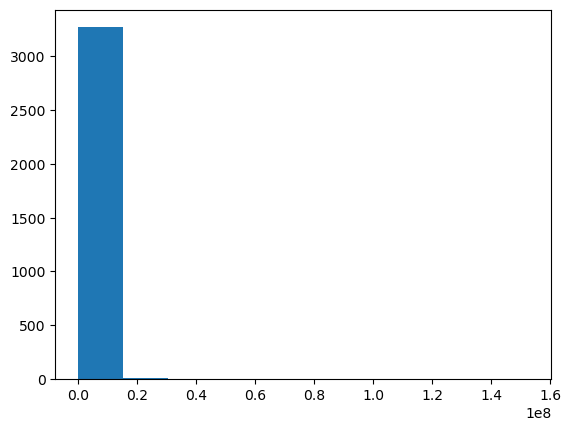

In [12]:
#Visualisation de la répartition des fréquentations par gare
plt.hist(df_gares_merged['total_voyageurs_non_voyageurs_2020'])
plt.show()

On remarque que pour mieux apprécier les fréquentations, il est nécessaire de passer au log.

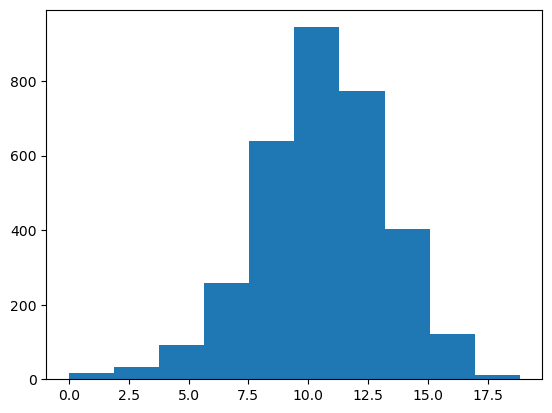

In [13]:
df_gares_merged['log_total_voyageurs_non_voyageurs_2020'] = np.log(df_gares_merged['total_voyageurs_non_voyageurs_2020'])
plt.hist(df_gares_merged['log_total_voyageurs_non_voyageurs_2020'])
plt.show()

In [14]:
#Application d'un filtre sur les frequentations : on ne garde que les gares les plus frequentées
df_gares_principales = df_gares_merged[df_gares_merged['log_total_voyageurs_non_voyageurs_2020']>= 14]

On regarde maintenant les gares très fréquentées pour lesquelles il nous manque les coordonnées GPS. A savoir, les gares qui sont des le dataset des fréquentations mais pas dans celui de la liste des gares.

In [15]:
df_gares_manquantes  = df_gares_principales[df_gares_principales['x_wgs84'].isna()==True]
df_gares_manquantes

,code_uic,total_voyageurs_non_voyageurs_2020,nom_gare,x_wgs84,y_wgs84,log_total_voyageurs_non_voyageurs_2020
384,87756403,4085871,Monaco-Monte-Carlo,NaN,NaN,15.223045
664,87113795,3664906,Villiers-sur-Marne - Le Plessis-Trévise,NaN,NaN,15.114313
1195,87113704,2380920,Rosny-sous-Bois,NaN,NaN,14.682998
1488,87758607,7980634,Châtelet les Halles,NaN,NaN,15.892528
1533,87116046,2496908,Émerainville - Pontault-Combault,NaN,NaN,14.730564
1806,87113209,3862190,Pantin,NaN,NaN,15.166745
1808,87758904,107666015,Paris Gare du Nord,NaN,NaN,18.494545
1852,87654798,2865667,Rosa Parks,NaN,NaN,14.868312
1855,87113696,3206275,Rosny Bois Perrier,NaN,NaN,14.980620
2347,87113522,1562549,Le Chénay Gagny,NaN,NaN,14.261829


- **Problème** : il nous manque les données GPS de gares importantes (la gare de Paris EST par exemple)
- **Solution** : ces gares étant -presque- toutes situées en région Ile de France (idf) on va aller chercher ces données sur l'API de la région idf.

On sort donc les données manquantes de ce dataframe et on va aller les chercher sur l'API idf (il nous manquera tout de même la gare de Monaco mais nous allons l'omettre car il ne s'agit que d'une gare et que Monaco n'est pas en France à proprement parlé).

In [16]:
#Elimination des gares dont on ne connait pas la fréquentation
df_gares_principales = df_gares_principales[df_gares_principales['x_wgs84'].isna()==False]
df_gares_principales.head(2)

,code_uic,total_voyageurs_non_voyageurs_2020,nom_gare,x_wgs84,y_wgs84,log_total_voyageurs_non_voyageurs_2020
1,87271460,2177954,Aéroport Charles de Gaulle 1,2.555964,49.008827,14.593896
7,87741132,1236162,Aix-les-Bains le Revard,5.908901,45.688112,14.027522


In [17]:
#Récupération des données manquantes (sauf Monaco) grâce à l'API de la région idf
df_region_idf_initial = importer("https://data.iledefrance.fr/api/v2/catalog/datasets/gares-et-points-darrets-du-reseau-transilien/exports/json?limit=-1&offset=0&timezone=UTC")

#On se restreint aux gares dont les données geographiques sont manquantes dans le dataframe des gares principales
df_region_idf = df_region_idf_initial[df_region_idf_initial.code_uic.isin(df_gares_manquantes['code_uic'])==True]
df_region_idf.head(2)

,code_uic,uic7,libelle_point_d_arret,libelle,libelle_stif_info_voyageurs,libelle_sms_gare,nom_gare,adresse,code_insee_commune,commune,x_lambert_ii_etendu,y_lambert_ii_etendu,coord_gps_wgs84,zone_navigo,gare_non_sncf
62,87113209,871132,PANTIN,PANTIN,GARE DE PANTIN,Pantin,Pantin,Avenue de la gare 93500 Pantin,93055,[Pantin],604688.0,2433279.0,"{'lon': 2.40040674765, 'lat': 48.8977738494}",2.0,0.0
166,87116038,871160,ROISSY EN BRIE,ROISSY EN BRIE,GARE DE ROISSY EN BRIE,Roissy en B.,Roissy-en-Brie,Place de la gare 77680 Roissy-en-Brie,77390,[Roissy-en-Brie],623033.0,2421933.0,"{'lon': 2.64984936854, 'lat': 48.7954076773}",5.0,0.0


**Remarque :** il nous manque encore la gare du Nord. En allant chercher manuellement la ligne correspondante, on remarque que c'est parce que le code uic est erroné (le code uic est différent dans les 2 bases). Après recherches, le vrai code uic est celui de la base idf. On le rectifie manuellement.

In [18]:
#Mise en évidence de l'erreur
print(df_region_idf_initial[df_region_idf_initial['libelle']=="PARIS NORD"][['libelle', 'code_uic']])
print(df_gares_manquantes[df_gares_manquantes['nom_gare']== "Paris Gare du Nord"][['nom_gare', 'code_uic']])

       libelle  code_uic
92  PARIS NORD  87271031
                nom_gare  code_uic
1808  Paris Gare du Nord  87758904


In [19]:
#Rectification de l'erreur, puis réiteration de l'opération qui récupère uniquement les gares manquantes
df_gares_manquantes.loc[df_gares_manquantes['nom_gare']=="Paris Gare du Nord", "code_uic"] = "87271031"
df_region_idf = df_region_idf_initial[df_region_idf_initial.code_uic.isin(df_gares_manquantes['code_uic'])==True]

#Pour simplifier, reset de l'index
df_region_idf.reset_index(inplace = True)
df_region_idf = df_region_idf.drop('index', axis=1)

In [20]:
#Récuperation des donnees gps pour la nouvelle base de donnees : séparation des données géographiques en 2 colonnes (latitude et longitude)
df_region_idf['x_wgs84'] = [0]*len(df_region_idf)
df_region_idf['y_wgs84'] = [0]*len(df_region_idf)

for i in range(len(df_region_idf)):
    df_region_idf.loc[i,'x_wgs84'] = df_region_idf['coord_gps_wgs84'][i]['lon']
    df_region_idf.loc[i,'y_wgs84'] = df_region_idf['coord_gps_wgs84'][i]['lat']
    

In [21]:
#Enfin, concaténation des dataframes venant de l'API SNCF et de l'API région IDF
df_complete_gares = pd.concat([df_gares_principales, df_region_idf], ignore_index = True)
df_complete_gares.head()

,code_uic,total_voyageurs_non_voyageurs_2020,nom_gare,x_wgs84,y_wgs84,log_total_voyageurs_non_voyageurs_2020,uic7,libelle_point_d_arret,libelle,libelle_stif_info_voyageurs,libelle_sms_gare,adresse,code_insee_commune,commune,x_lambert_ii_etendu,y_lambert_ii_etendu,coord_gps_wgs84,zone_navigo,gare_non_sncf
0,87271460,2177954.0,Aéroport Charles de Gaulle 1,2.555964,49.008827,14.593896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,87741132,1236162.0,Aix-les-Bains le Revard,5.908901,45.688112,14.027522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87741132,1236162.0,Aix-les-Bains le Revard,5.908892,45.688219,14.027522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87583005,1307929.0,Angoulême,0.164145,45.653643,14.083956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87382002,4409499.0,Bécon les Bruyères,2.268813,48.905170,15.299272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On finit, après quelques ajustements, par obtenir le dataset souhaité des gares les plus fréquentées ainsi que leurs coordonnées GPS. On s'en reservira plus tard dans la partie Visualisation et Représentation Gprahique de ce travail.

### **1.2 Analyse des retards et des annulations de trains de la SNCF**

Pour cette partie, on travaille exclusivement sur le dataset **regularite-mensuelle-tgv-aqst** qui contient l'ensemble des données sur les retards et les annulations des lignes de TGV gérées par la SNCF. On commence par importer et nettoyer les données.

In [22]:
df_retards = importer('https://ressources.data.sncf.com/api/v2/catalog/datasets/regularite-mensuelle-tgv-aqst/exports/json?limit=-1&offset=0&timezone=UTC')
df_retards.head(2)

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BREST,PARIS MONTPARNASSE,225,284,3,None,4,2.250000,...,19,5.370390,5,2,33.333333,53.333333,0.000000,13.333333,0.000000,0.0
1,2018-01,National,PARIS MONTPARNASSE,ANGOULEME,126,239,4,None,36,6.347685,...,15,4.113191,3,0,15.384615,38.461538,19.230769,23.076923,3.846154,0.0


In [23]:
#on retire les colonnes de commentaires qui sont generalement vides
df_retards = df_retards.drop('commentaire_annulation', axis = 1)
df_retards = df_retards.drop('commentaire_retards_depart', axis = 1)
df_retards = df_retards.drop('commentaires_retard_arrivee', axis = 1)

In [24]:
#on retire aussi les colonnes de NaN et dont les retards valent 0 qui ne nous interessent pas ici
df_retards.dropna(inplace = True)
df_retards = df_retards.drop(df_retards[df_retards['retard_moyen_arrivee']==0].index)

In [25]:
#on copie la dataframe initiale par securite
df_retards_initial = df_retards.copy()

On crée ensuite les colonnes susceptibles de nous interesser dans la partie visualisation.

In [26]:
df_retards['prct_nb_train_depart_retard'] = df_retards['nb_train_depart_retard']/df_retards['nb_train_prevu']*100
df_retards['prct_nb_annulation'] = df_retards['nb_annulation']/df_retards['nb_train_prevu']*100

In [27]:
#On enlève les valeurs infini possibles dans les colonnes crées et on sépare la date en 2 colonnes distinctes selon le mois et l'année
df_retards[df_retards['prct_nb_train_depart_retard'] == np.inf] = 0
df_retards[df_retards['prct_nb_annulation'] == np.inf] = 0
df_retards[['annee','mois']]=df_retards.date.str.split('-',expand=True)
df_retards['annee'] = pd.to_numeric(df_retards['annee'])
df_retards['mois'] = pd.to_numeric(df_retards['mois'])

## **2. VISUALISATION : Analyse Descriptive et Représentation Graphique**

Dans cette partie, on se concentre sur des analyses statistiques des données qui nous intéressent et leurs représentation graphique. Cela nous permet de tirer les premières conclusions quant à l'état et l'évolution du réseau ferré français et de la fréquence des perturbations qu'il subit.

### **2.1 Cartographie du réseau ferré de la SNCF**

On va simplement utiliser le dataset crée dans la **partie 1.1** de la **partie 1.** afin de représenter les principales gares de la SNCF (en terme de fréquentation) sur une carte intérractive.

In [28]:
#Visualisation de la map des gares sur le territoire français avec une carte intéractive

m = folium.Map(location=[45.8666, 2.3333], min_zoom=3, max_zoom=14, zoom_start=5.3, tiles = 'Stamen Terrain')
#affichage des gares principales dont on avait les donnees gps par l'API SNCF
for i in df_complete_gares.index:
    tooltip = df_complete_gares['nom_gare'][i]
    folium.Marker([df_complete_gares['y_wgs84'][i],df_complete_gares['x_wgs84'][i]], popup=df_complete_gares['nom_gare'][i], tooltip=tooltip).add_to(m)

m

On remarque que la gare **Paris EST**, dont les données géographiques manquaient dans la base de données initiale (API SNCF), apparaît bien.

<img src="Paris_EST.png" alt="Drawing" style="width: 500px;"/>

### **2.2 Analyse statistique des taux de retards et d'annulations des trains de la SNCF**

Dans cette partie, comme dans la dernière partie dédiée à la modélisation, on utilise les données sur les retards des TGV précedemment traitées.

#### **2.2.1 Analyse de l'évolution et de l'effet de substitution des taux de retard et d'annulation**

Dans cette partie, on va s'intéresser à l'évolution des taux de retard et d'annulation des TGV de la SNCF depuis 2018. On va regulièrement faire appel à la fonction **aggreg_mensuel** qui permet de renvoyer la liste à 12 éléments (pour chaque mois) d'une donnée numérique (du dataset df_retards défini plus haut) par année. On commence par analyser les taux de retard.

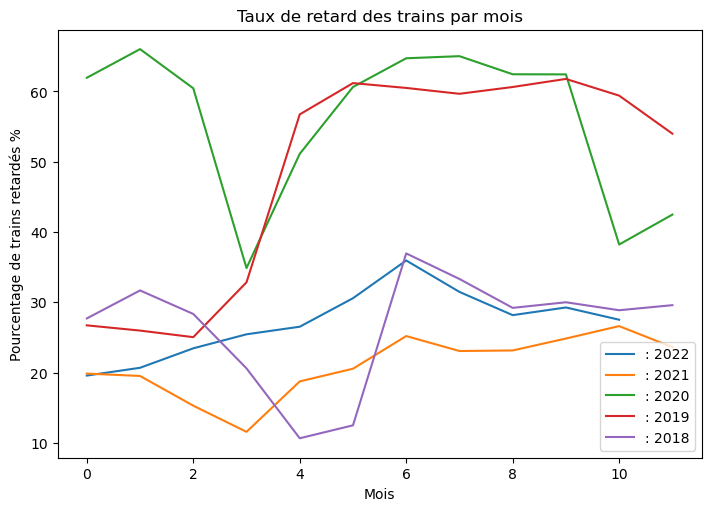

In [30]:
fig, ax = plt.subplots(figsize=(7, 5), layout='constrained')
#On trace la courbe pour chaque année renseignée dans le dataset
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_train_depart_retard',2022), label=': 2022')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_train_depart_retard',2021), label=': 2021')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_train_depart_retard',2020), label=': 2020')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_train_depart_retard',2019), label=': 2019')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_train_depart_retard',2018), label=': 2018')
ax.set_xlabel('Mois')  
ax.set_ylabel('Pourcentage de trains retardés %') 
ax.set_title("Taux de retard des trains par mois")  
ax.legend()
plt.show()

On remarque une tendance à la baisse des retards entre Février et Avril suivi d'une remontée jusqu'en Juin. Par ailleurs, les années 2019 et 2020 ont été particulièrement pénible au niveau des retards. Pour essayer de mettre mieux en valeur les phénomènes décris, on va plutôt tracer la courbe étalée sur l'entièreté de la période.

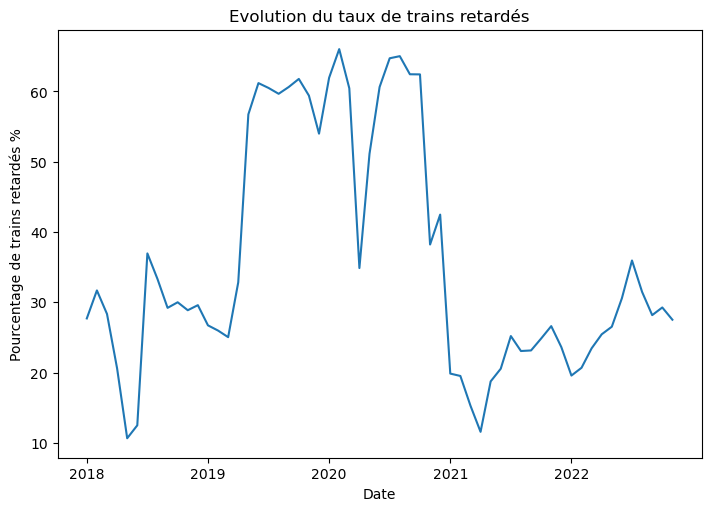

In [31]:
R =  aggreg_totale(df_retards, 'prct_nb_train_depart_retard')
fig, ax = plt.subplots(figsize=(7, 5), layout='constrained')
ax.plot(R)
ax.set_xlabel('Date')  
ax.set_ylabel('Pourcentage de trains retardés %') 
ax.set_title("Evolution du taux de trains retardés")
plt.xticks([0,12,24,36,48],['2018', '2019', '2020', '2021', '2022'])
plt.show()

On observe encore mieux l'effet cyclique des retards des trains. Au début de chaque nouvelle année, on observe une diminuation du pourcentage de trains en retards suivi d'une remonté à partir de la fin du premier tier de l'année. 

Maintenant, il serait intéressant de comparer le taux de retard avec le taux d'annulation pour voir si une baisse du taux de retard est en fait compensé par une augmentation du taux d'annulation. On repète le même procédé pour avoir la courbe des taux d'annulation mensuels.

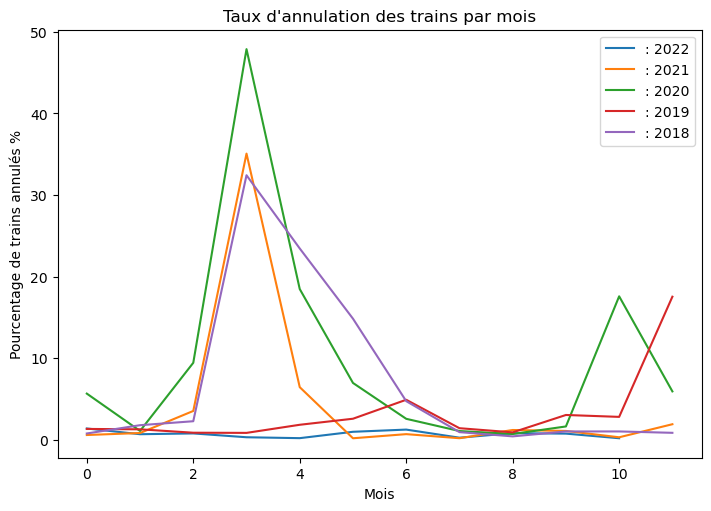

In [32]:
fig, ax = plt.subplots(figsize=(7, 5), layout='constrained')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_annulation',2022), label=': 2022')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_annulation',2021), label=': 2021')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_annulation',2020), label=': 2020')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_annulation',2019), label=': 2019')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_annulation',2018), label=': 2018')
ax.set_xlabel('Mois')  
ax.set_ylabel('Pourcentage de trains annulés %') 
ax.set_title("Taux d\'annulation des trains par mois")  
ax.legend()
plt.show()   

Ici, on voit clairement qu'entre février et avril, il y a un pic du nombre d'annulation des trains. On affiche la courbe étalée sur toute la période pour rendre le phénomène encore un peu plus lisible.


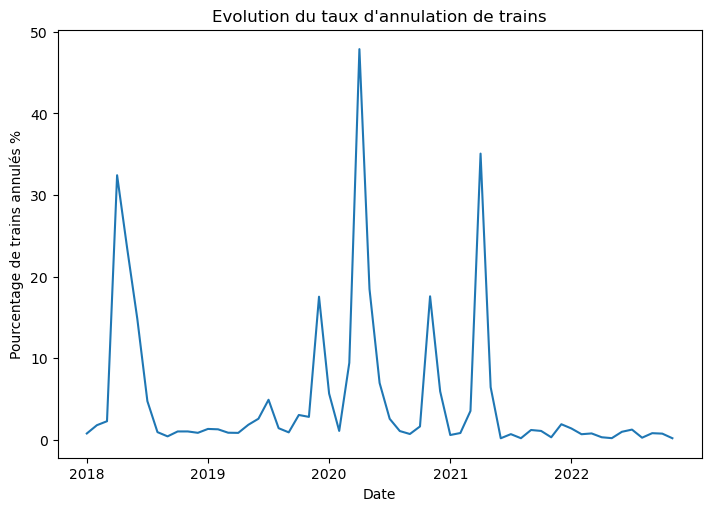

In [33]:
A = aggreg_totale(df_retards, 'prct_nb_annulation')
fig, ax = plt.subplots(figsize=(7, 5), layout='constrained')
ax.plot(A)
ax.set_xlabel('Date')  
ax.set_ylabel('Pourcentage de trains annulés %') 
ax.set_title("Evolution du taux d\'annulation de trains")
plt.xticks([0,12,24,36,48],['2018', '2019', '2020', '2021', '2022'])
plt.show()

C'est encore plus clair ici, en 2018, 2020 et 2021 on observe le même pic d'annulation en début d'année. Cela correspond ou même moment où on observait une baisse du taux de trains retardés. On peut donc afficher sur le même graphe l'évolution du taux d'annulation et de retard pour mettre en avant ce phénomène.

Pour finir cette première partie, on peut rassembler les 2 métriques sur un même graphique pour illustrter de façon convaincante l'effet de substitution entre les retards et les annulations de la SNCF.

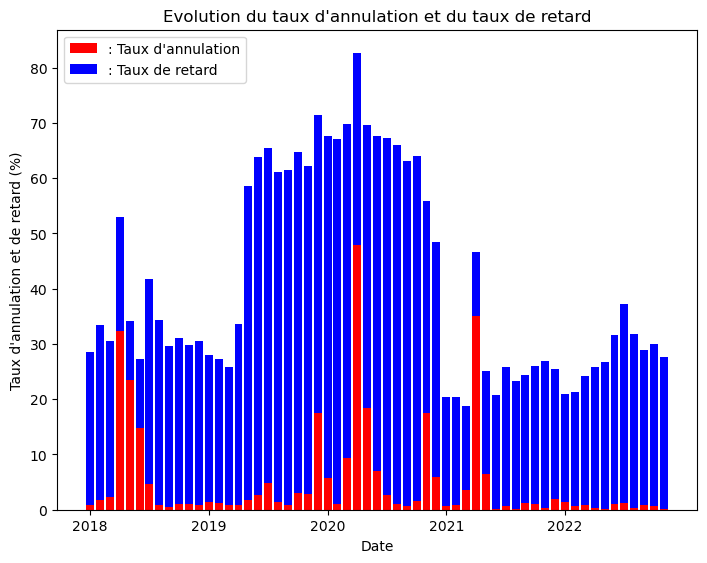

In [34]:
ind = np.arange(len(A)) 
width = 0.8
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, A, width, color='r')
ax.bar(ind, R, width,bottom=A, color='b')
ax.set_ylabel('Taux d\'annulation et de retard (%)')
ax.set_xlabel('Date')
ax.set_title('Evolution du taux d\'annulation et du taux de retard')
ax.legend(labels=[': Taux d\'annulation', ': Taux de retard'])
plt.xticks([0,12,24,36,48],['2018', '2019', '2020', '2021', '2022'])
plt.show()

#### **2.2.1 Analyse descriptifve de l'évolution des causes de retard**

On va maintenant s'intéresser aux motifs des retards des TGV de la SNCF. Pour cela, on utilie la même fonction aggreg_totale pour voir l'évolution des causes des retards dans le temps.

In [35]:
#Pour chaque cause, on crée la liste qui contient le pourcentage de responsabilité des retards sur chaque période
E = aggreg_totale(df_retards, 'prct_cause_externe')
I = aggreg_totale(df_retards, 'prct_cause_infra')
G = aggreg_totale(df_retards, 'prct_cause_gestion_trafic')
M = aggreg_totale(df_retards, 'prct_cause_materiel_roulant')
GG = aggreg_totale(df_retards, 'prct_cause_gestion_gare')
V = aggreg_totale(df_retards, 'prct_cause_prise_en_charge_voyageurs')

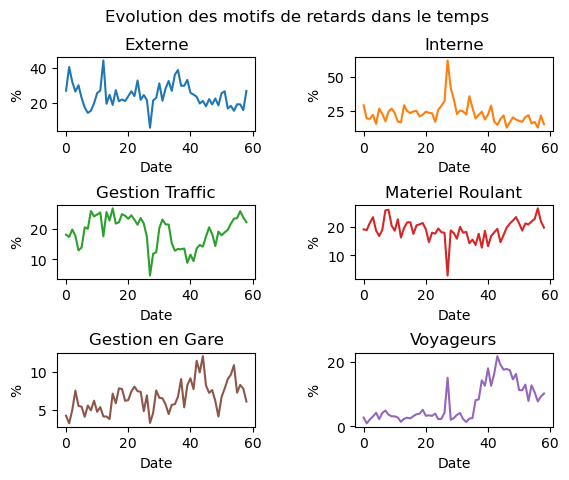

In [36]:
#On trace les 6 courbes d'évolution pour chaque motif de retard
fig, axs = plt.subplots(3, 2)
fig.suptitle('Evolution des motifs de retards dans le temps')
axs[0, 0].plot(E)
axs[0, 0].set_title('Externe')
axs[0, 1].plot(I, 'tab:orange')
axs[0, 1].set_title('Interne')
axs[1, 0].plot(G, 'tab:green')
axs[1, 0].set_title('Gestion Traffic')
axs[1, 1].plot(M, 'tab:red')
axs[1, 1].set_title('Materiel Roulant')
axs[2, 0].plot(GG, 'tab:brown')
axs[2, 0].set_title('Gestion en Gare')
axs[2, 1].plot(V, 'tab:purple')
axs[2, 1].set_title('Voyageurs')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='%')
    plt.gcf().subplots_adjust(wspace = 0.5, hspace = 1)     

Les 6 graphes sont difficilement interprétable sous cette forme et on préfèrera les afficher tous sur un même graphe aggrégé pour mieux saisir les dynamiques grâce à la commande stackplot. 

In [37]:
#On commence par créer la liste O qui contient le pourcentage des autres causes que celles indiquées dans notre dataset
O = []
for i in range(60):
    x = 100 - E[i]- I[i]- G[i]- M[i]- GG[i]- V[i]
    O.append(x)

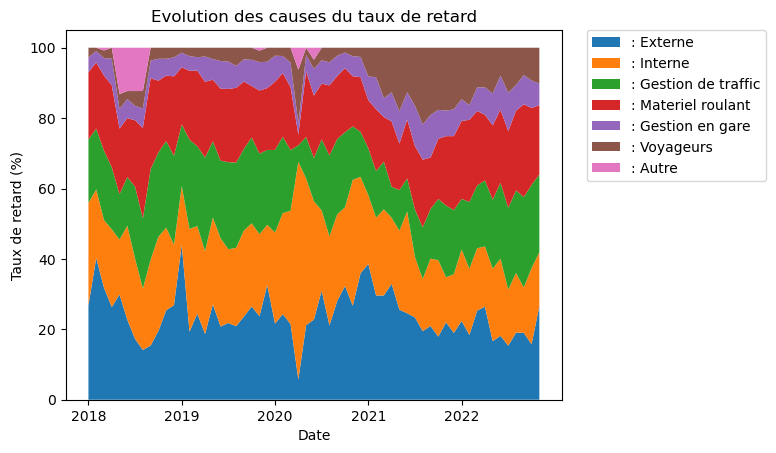

In [38]:
#On trace le graphe avec la fonction stackplot
C = [E, I, G, M, GG, V, O]
inde = range(1,61)
fig, ax = plt.subplots()
ax.stackplot(inde, C)
ax.set_ylabel('Taux de retard (%)')
ax.set_xlabel('Date')
ax.set_title('Evolution des causes du taux de retard')
ax.legend(labels=[': Externe', ': Interne',': Gestion de traffic',': Materiel roulant',': Gestion en gare',': Voyageurs', ': Autre' ], bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.xticks([1,13,25,37,49],['2018', '2019', '2020', '2021', '2022'])
plt.show()

## **3. MODÉLISATION des retards de la SNCF**

Dans cette partie, on cherche à expliquer les retards grâce à des variables explicatives. Pour cela, on va procéder à plusieurs régressions afin d'obtenir la meilleure prédiction possible.

### **3.1. Préparation des données pour la régression**

In [39]:
#Récupération de la base 
df_retards = df_retards_initial.copy()

In [40]:
#Listage des différentes causes de retards du dataframe
causes_retards = ['cause_materiel_roulant', 'cause_infra', 'cause_gestion_trafic', 'cause_externe', 'cause_gestion_gare', 'cause_prise_en_charge_voyageurs']
causes_retards_large = ['nb_annulation', 'cause_materiel_roulant', 'cause_infra', 'cause_gestion_trafic', 'cause_externe', 'cause_gestion_gare', 'cause_prise_en_charge_voyageurs', 'nb_train_prevu']

In [41]:
#On passe les causes de retards en niveau plutôt qu'en pourcentage pour homogénéiser les données
#On utilise pour cela la fonction niveau qui est dans le fichier fonctions.py
niveau(df_retards,df_retards['nb_train_retard_arrivee'], causes_retards).head(2)

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,...,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,cause_materiel_roulant,cause_infra,cause_gestion_trafic,cause_externe,cause_gestion_gare,cause_prise_en_charge_voyageurs
0,2018-01,National,BREST,PARIS MONTPARNASSE,225,284,3,4,2.250000,0.032028,...,0.000000,13.333333,0.000000,0.0,2.533333,10.133333,0.000000,6.333333,0.000000,0.0
1,2018-01,National,PARIS MONTPARNASSE,ANGOULEME,126,239,4,36,6.347685,0.751560,...,19.230769,23.076923,3.846154,0.0,6.461538,10.769231,5.384615,4.307692,1.076923,0.0


In [42]:
#Elimination des valeurs excessives
df_retards = df_retards.drop(df_retards[df_retards['nb_train_retard_arrivee']>170].index)
df_retards = df_retards.drop(df_retards[df_retards['nb_train_retard_arrivee']==1].index)

In [43]:
df_retards.loc[:,'log_nb_train_retard_arrivee']  = np.log(df_retards['nb_train_retard_arrivee'])

In [47]:
#Copie du dataframe initiale (par securité)
df_retards_initial = df_retards.copy()

In [56]:
#Recalibrage des données 
features = df_retards[causes_retards_large]
features = StandardScaler().fit(features.values).transform(features.values)
df_retards[causes_retards_large] = features
df_retards.head(2)

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,...,prct_nb_annulation,annee,mois,cause_materiel_roulant,cause_infra,cause_gestion_trafic,cause_externe,cause_gestion_gare,cause_prise_en_charge_voyageurs,log_nb_train_retard_arrivee
0,2018-01,National,BREST,PARIS MONTPARNASSE,225,0.146255,-0.283401,4,2.250000,0.032028,...,1.056338,2018,1,-0.605264,0.293949,-0.885526,-0.216854,-0.789560,-0.631354,2.944439
1,2018-01,National,PARIS MONTPARNASSE,ANGOULEME,126,-0.124384,-0.244678,36,6.347685,0.751560,...,1.673640,2018,1,-0.005243,0.371801,-0.216829,-0.443877,-0.434107,-0.631354,3.332205


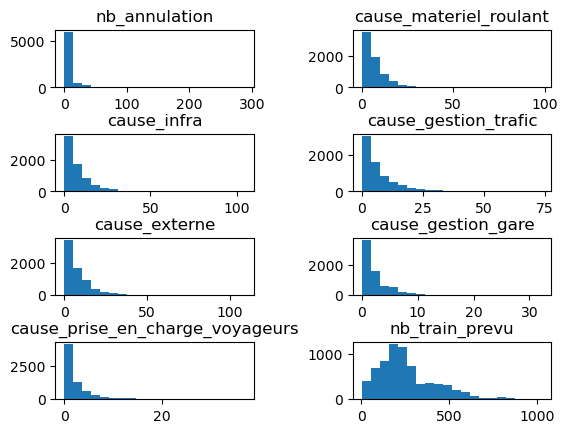

In [48]:
#Visualisation des données
for i in range(len(causes_retards_large[:])):
    plt.subplot(4,2,i+1)
    plt.hist(df_retards[causes_retards_large[i]], bins = 20)
    plt.title(causes_retards_large[i])
    plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.8)

In [61]:
#Visualisation des données
for i in range(len(causes_retards_large[:-1])):
    df_retards.loc[:,'log_'+causes_retards_large[i]]  = np.log(df_retards[causes_retards_large[i]])
df_retards

/opt/mamba/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,...,cause_gestion_gare,cause_prise_en_charge_voyageurs,log_nb_train_retard_arrivee,log_nb_annulation,log_cause_materiel_roulant,log_cause_infra,log_cause_gestion_trafic,log_cause_externe,log_cause_gestion_gare,log_cause_prise_en_charge_voyageurs
0,2018-01,National,BREST,PARIS MONTPARNASSE,225,284,3,4,2.250000,0.032028,...,0.000000,0.000000,2.944439,1.098612,0.929536,2.315830,-inf,1.845827,-inf,-inf
1,2018-01,National,PARIS MONTPARNASSE,ANGOULEME,126,239,4,36,6.347685,0.751560,...,1.076923,0.000000,3.332205,1.386294,1.865867,2.376693,1.683546,1.460402,0.074108,-inf
2,2018-01,National,PARIS MONTPARNASSE,POITIERS,93,506,4,62,7.717742,0.644090,...,0.000000,0.000000,3.951244,1.386294,2.302585,3.091042,1.791759,2.639057,-inf,-inf
3,2018-01,National,PARIS MONTPARNASSE,TOURS,72,186,0,30,9.582778,1.093907,...,1.846154,0.000000,3.871201,-inf,2.222542,3.098011,1.711717,2.222542,0.613104,-inf
4,2018-01,National,POITIERS,PARIS MONTPARNASSE,94,472,4,224,6.784673,3.229701,...,1.561404,1.561404,4.488636,1.386294,2.642810,3.703682,2.843480,2.642810,0.445585,4.455851e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,2022-11,National,PARIS MONTPARNASSE,BREST,226,247,1,34,13.799510,1.462060,...,3.000000,1.000000,3.526361,0.000000,2.079442,2.397895,1.386294,1.945910,1.098612,1.554312e-15
7301,2022-11,National,PARIS MONTPARNASSE,TOULOUSE MATABIAU,263,199,0,21,9.157143,0.477303,...,0.000000,1.000000,2.833213,-inf,0.693147,1.609438,1.098612,1.791759,-inf,-1.110223e-16
7302,2022-11,National,PARIS MONTPARNASSE,VANNES,152,242,0,33,15.357576,1.651722,...,3.000000,3.000000,3.713572,-inf,2.639057,1.945910,1.609438,2.197225,1.098612,1.098612e+00
7303,2022-11,National,PARIS NORD,LILLE,66,585,5,52,18.957692,1.392820,...,5.380952,4.285714,4.234107,1.609438,2.685577,2.769608,2.836011,2.456736,1.682865,1.455287e+00


ValueError: supplied range of [-inf, 1011] is not finite

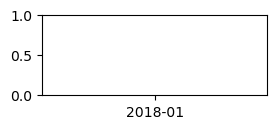

In [63]:
#Visualisation des données
for i in range(len(causes_retards_large[:])):
    plt.subplot(4,2,i+1)
    plt.hist(df_retards['log_'+causes_retards_large[i]]>0, bins = 20)
    plt.title('log_'+causes_retards_large[i])
    plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.8)

Ici, les données sont correctes donc on a pas besoin de passer au log.

### **3.2 Première régression à une variable**

In [58]:
#Appel de la fonction régression du fichier fonctions.py

results_s = regression(df_retards[['cause_externe']], df_retards[['nb_train_retard_arrivee']])
print(results_s.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     8087.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:45:54   Log-Likelihood:                -30559.
No. Observations:                6999   AIC:                         6.112e+04
Df Residuals:                    6997   BIC:                         6.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            34.7885      0.228    152.716

Le R^2, caractéristique du pouvoir explicatif du modèle, est d'environ 0.56 (1 correspondant à une prédiction parfaite). De plus, la variable cause_externe est significative.

### **3.3 Régression à plusieurs variables**

In [59]:
#On passe maintenant à une regression à plusieurs variables
results = regression(df_retards[causes_retards_large], df_retards[['nb_train_retard_arrivee']])
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 5.149e+04
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:45:57   Log-Likelihood:                -18923.
No. Observations:                6999   AIC:                         3.786e+04
Df Residuals:                    6990   BIC:                         3.793e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [60]:
#Modélisation finale : on retire les variables non significatives
results = regression(df_retards[causes_retards], df_retards[['nb_train_retard_arrivee']])
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 6.860e+04
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:46:00   Log-Likelihood:                -18927.
No. Observations:                6999   AIC:                         3.787e+04
Df Residuals:                    6992   BIC:                         3.792e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Analyse des coefficients**

Le R^2 de la regression est satisfaisant et a largement augmenté (en ajoutant des variables, on augmente le pouvoir explicatif du modèle sous certaines conditions). La variable nb_annulation n'est pas significative et nb_train_prevu n'est pas significative au seuil de 1%. Le reste des variables sont significatives. Le coefficient le plus élevé est celui de cause_externe. Il signifie qu'une cause externe provoque le retard d'environ 9 trains en moyenne.


**Conclusion** : selon cette regression, l'incident impliquant le plus de retard est la cause externe (météo...). Lorsqu'on observe un incident externe de plus, on prédit le retard de 9 à 10 trains supplémentaires. Malheureusement, la SNCF ne peut pas vraiment agir sur ce genre d'incidents. 
En revanche, si la SNCF trouvait par exemple un moyen de supprimer les problèmes de matériel roulant, elle éviterait le retard de 6 à 7 trains par ligne et par mois. 
Ce qui est plus embêtant pour la SNCF est qu'aucune cause de retard ne "sort du lot" en terme d'impact donc la SNCF doit agir sur l'ensemble de ces causes pour réduire les retards.

### **3.4 Prédiction**

intercept :  3.1995745064687044
coeffs :  [0.22609255 0.20974101 0.20459559 0.24663178 0.09317432 0.10739703]
rsq :  0.7590807780506714
rmse :  0.44003647057687567



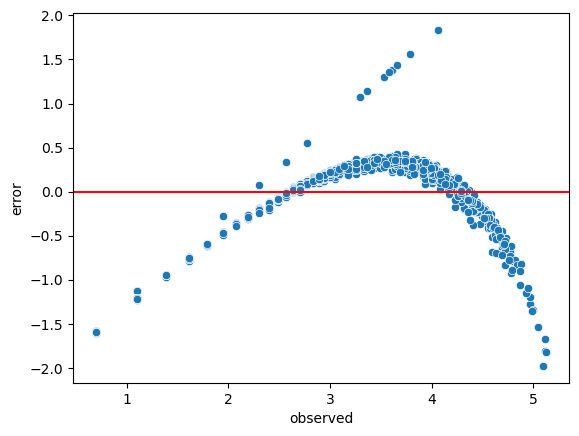

In [61]:
x = df_retards[causes_retards]
y = df_retards['log_nb_train_retard_arrivee']

prediction(x, y)
print()

On remarque de le modèle souffre d'un problème de spécification

### **3.5 Sélection des variables avec  le LASSO**

In [62]:
#Estimation du modèle LASSO
X_train = prediction(x, y, afficher = False)[0]
y_train = prediction(x, y, afficher = False)[1]

lasso1 = Lasso(fit_intercept=True,normalize=False, alpha = 0.00655).fit(X_train,y_train)

#selection de variables
features_selec = x.columns[np.abs(lasso1.coef_)>0].tolist()
features_selec 

#N'hésitez pas à refaire tourner la cellule si elle ne selectionne aucune variable

/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


['cause_infra', 'cause_gestion_trafic', 'cause_prise_en_charge_voyageurs']

In [63]:
#corrélations entre les variables sélectionnées
corr = df_retards[features_selec].corr()

plt.figure()
p = corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
p

/tmp/ipykernel_138/2425215618.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  p = corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,cause_infra,cause_gestion_trafic,cause_prise_en_charge_voyageurs
cause_infra,1.00,0.54,0.28
cause_gestion_trafic,0.54,1.00,0.34
cause_prise_en_charge_voyageurs,0.28,0.34,1.00


<Figure size 640x480 with 0 Axes>

Si les variables ne sont pas exagérément corrélés, on peut refaire tourner notre prédiction.

intercept :  3.1942496620467264
coeffs :  [0.35406906 0.3564515  0.18191225]
rsq :  0.6209198353150251
rmse :  0.5485976719427638



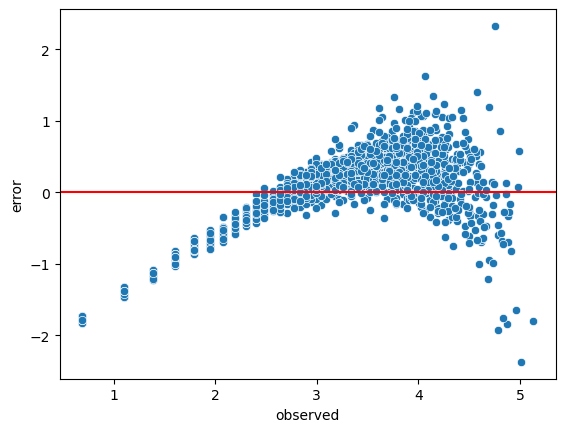

In [64]:
x = df_retards[features_selec]
y = df_retards['log_nb_train_retard_arrivee']

prediction(x, y)
print()

Finalement, notre modèle souffre toujours d'un problème de spécification mais il est quand même meilleur que le précédent. 

## **Conclusion**

#### **Apports**

Ce projet nous a permis de mettre en application l'ensemble des notions vu pendant le cours de *Python pour la data science* dispensé en 2ème année à l'ENSAE Paris. Il nous a permis de nous confronter à de nombreux problèmes de natures différentes et à les surmonter grâce à différents outils. L'utilisation de Git, par exemple,a été un outil nouveau mais précieux pour la réalisation de ce projet au même titrer que nos connaissances théoriques acquises avec le cours d'*Econometrics* de l'ENSAE. L'ensemble du groupe a pu s'investir dans chacune des partiesd du projet et en retirer des enseignements utlies.

#### **Bilan**